# 10_Simple-MLP-unsupervised-SBATCH.ipynb

Run several experiments and plot results

- Full MNIST dataset
- Number of epochs
- Tanh vs linear/margins embedding contrastive loss

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.training_results import MLPUnsupervisedTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [4]:
batch_size = 32
subset_fraction = 0.05
validation_ratio = 6
seed = 42
selected_labels = [4, 9]

train_pair_dataloader, val_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=True, subset_fraction=subset_fraction, validation_ratio=validation_ratio, seed=seed, 
    selected_labels=selected_labels
)
test_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=False, subset_fraction=subset_fraction, 
    selected_labels=selected_labels
)

device: cpu
num_workers: 1
device: cpu
num_workers: 1


# No pruning

## Quick test

```
sbatch sbatch_scripts/10_no-prune_linear_fast.sh
```

In [5]:
no_prune_linear_fast_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/no_prune_linear_fast/sbatch-54780166_bs-32_sf-0.05_sl-49_vr-6_id-0.5_nti-100_lmd-2_pat-linear_m-5.0_ugpp-False_lr-0.001_s-4")


In [6]:
no_prune_linear_fast_result.params['ugpp']

'False'

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_linear_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

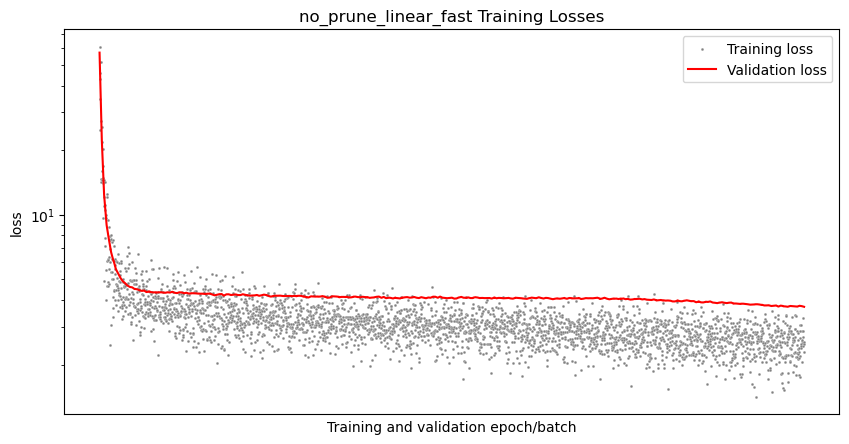

In [7]:
no_prune_linear_fast_result.plot_training_losses()

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Grow/prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'no_prune_linear_fast Pruning History'}, xlabel='epoch', ylabel='test_err'>],
       dtype=object))

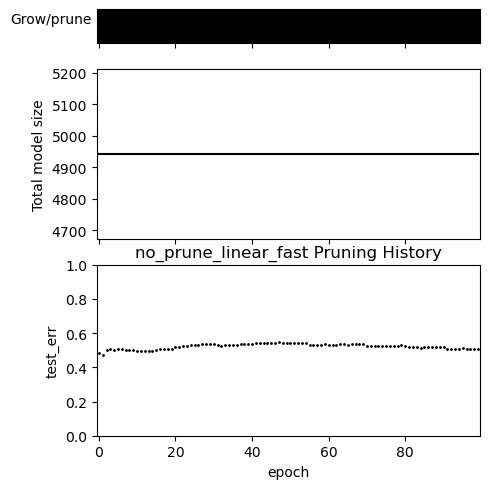

In [8]:
no_prune_linear_fast_result.plot_pruning()

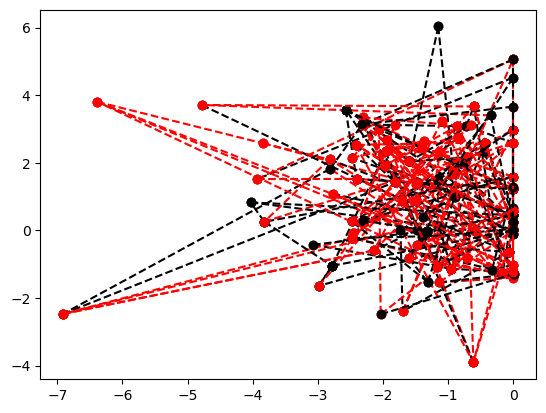

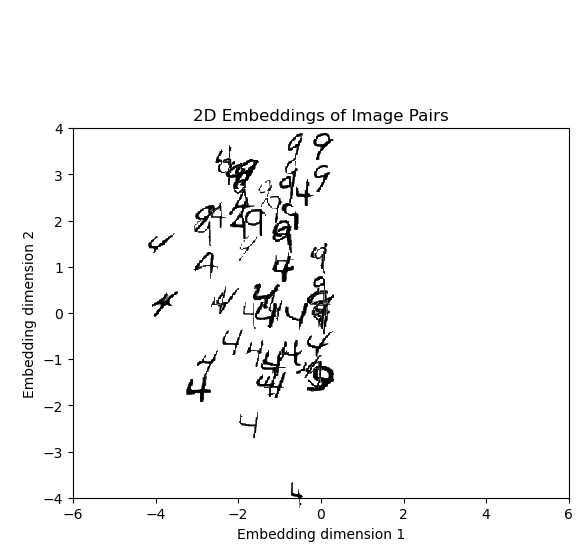

In [9]:
no_prune_linear_fast_result.set_trained_model(99)
no_prune_linear_fast_result.plot_pairs(test_pair_dataloader)
plt.show()
no_prune_linear_fast_result.plot_image_embeddings(test_pair_dataloader)
plt.show()

`sbatch sbatch_scripts/10_no-prune_tanh_fast.sh`

In [10]:
no_prune_tanh_fast_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/no_prune_tanh_fast/sbatch-54781620_bs-32_sf-0.05_sl-49_vr-6_id-0.5_nti-100_lmd-2_pat-Tanh_m-0.2_ugpp-False_lr-0.001_s-4")


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_tanh_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

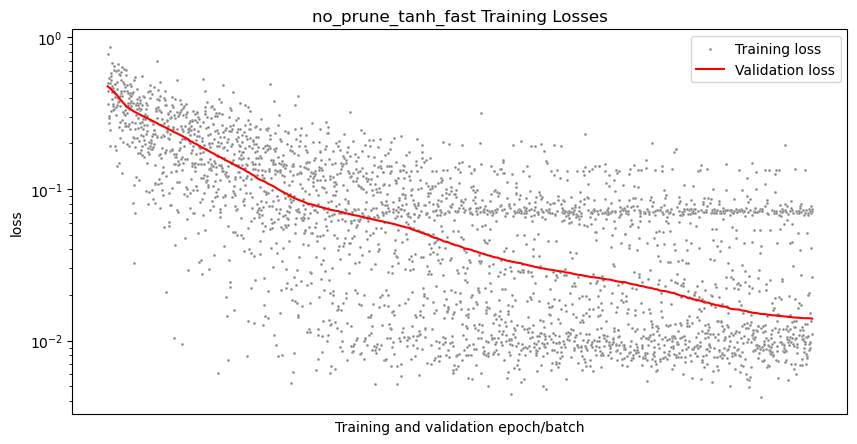

In [11]:
no_prune_tanh_fast_result.plot_training_losses()

(<Figure size 500x500 with 3 Axes>,
 array([<Axes: ylabel='Grow/prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'no_prune_tanh_fast Pruning History'}, xlabel='epoch', ylabel='test_err'>],
       dtype=object))

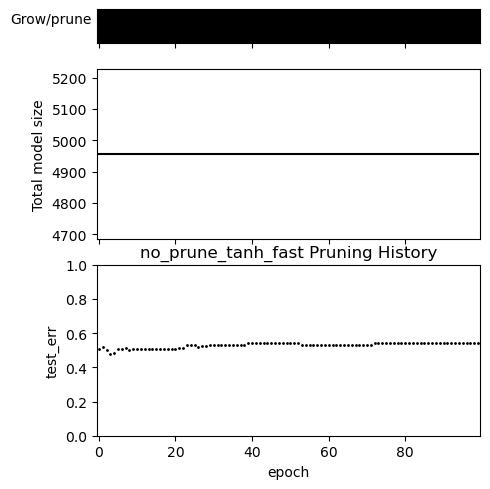

In [12]:
no_prune_tanh_fast_result.plot_pruning()

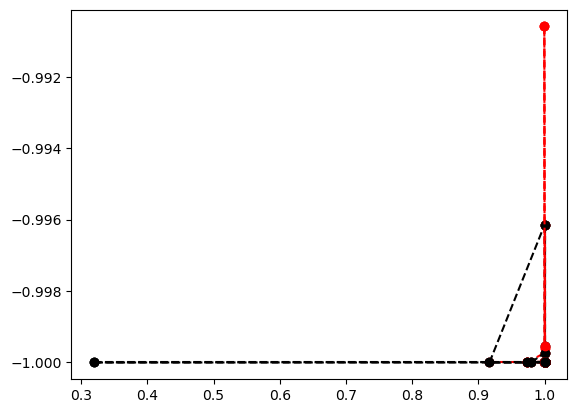

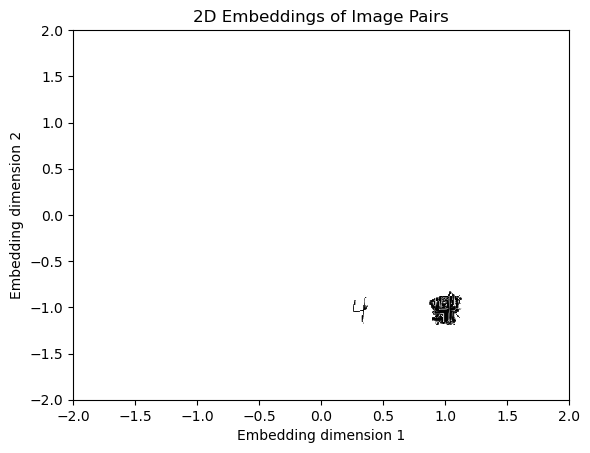

In [13]:
no_prune_tanh_fast_result.set_trained_model(99)
no_prune_tanh_fast_result.plot_pairs(test_pair_dataloader)
plt.show()
no_prune_tanh_fast_result.plot_image_embeddings(test_pair_dataloader, xlim=(-2,2), ylim=(-2, 2))
plt.show()

## Full jobs

More epochs, 10% of MNIST
- `sbatch sbatch_scripts/10_no-prune_tanh_full.sh` Job id=54883277
- `sbatch sbatch_scripts/10_no-10_no-prune_linear_full.sh .sh` Job id=54883276

In [14]:
no_prune_linear_full_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/no_prune_linear_full/sbatch-54883276_bs-32_sf-0.1_sl-49_vr-6_id-0.5_nti-500_lmd-2_pat-linear_m-5.0_ugpp-False_lr-0.001_s-4")
no_prune_tanh_full_result= MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/no_prune_tanh_full/sbatch-54883277_bs-32_sf-0.1_sl-49_vr-6_id-0.5_nti-500_lmd-2_pat-Tanh_m-0.2_ugpp-False_lr-0.001_s-4")


In [15]:
no_prune_linear_full_result.plot_training_losses()
plt.show()

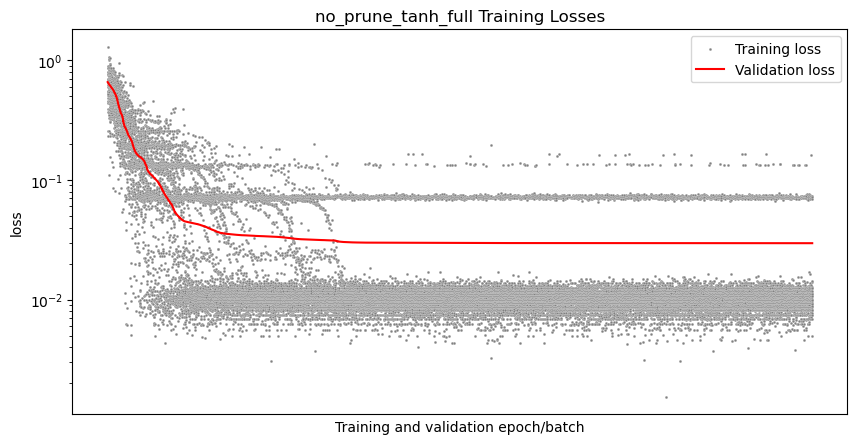

In [12]:
no_prune_tanh_full_result.plot_training_losses()
plt.show()

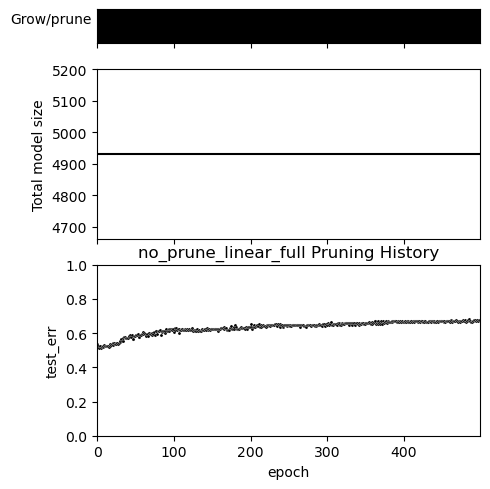

In [13]:
no_prune_linear_full_result.plot_pruning()
plt.show()

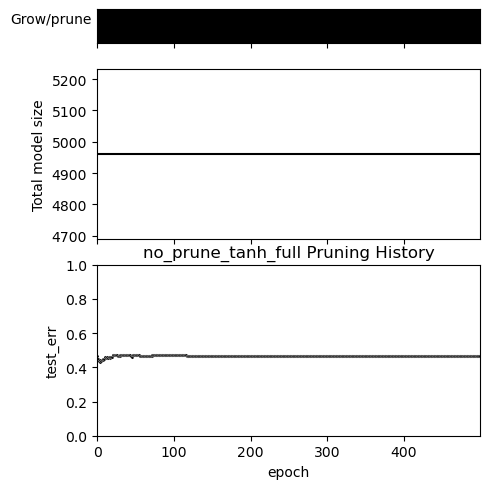

In [14]:
no_prune_tanh_full_result.plot_pruning()
plt.show()

In [ ]:
no_prune_linear_full_result.set_trained_model(0)
fig, ax = no_prune_linear_full_result.plot_image_embeddings(test_pair_dataloader, num_pairs_per_batch=2)
plt.show()

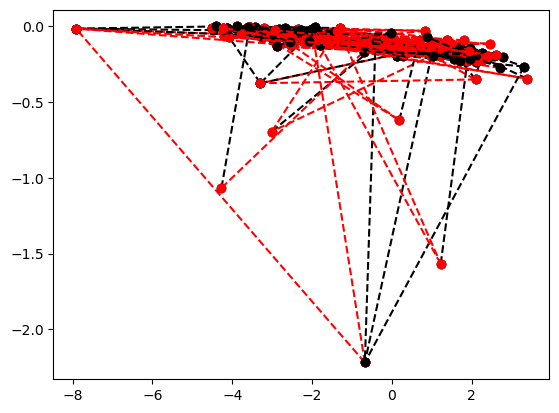

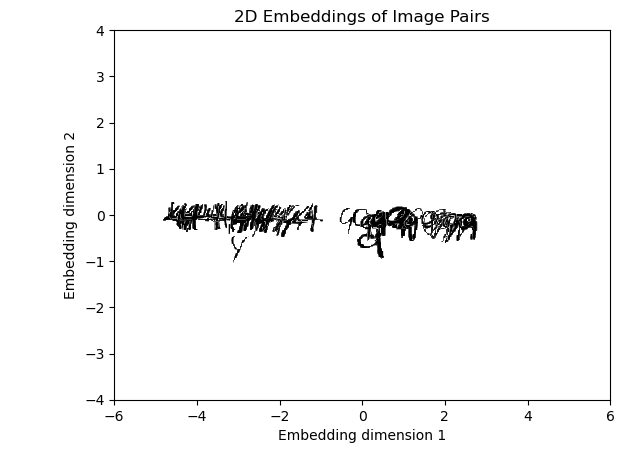

In [16]:
no_prune_linear_full_result.set_trained_model(99)
no_prune_linear_full_result.plot_pairs(test_pair_dataloader)
plt.show()
no_prune_linear_full_result.plot_image_embeddings(test_pair_dataloader)
plt.show()

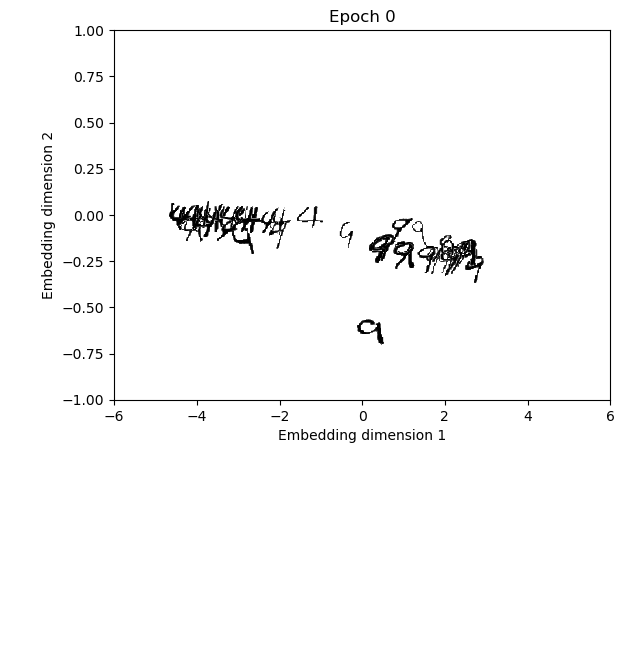

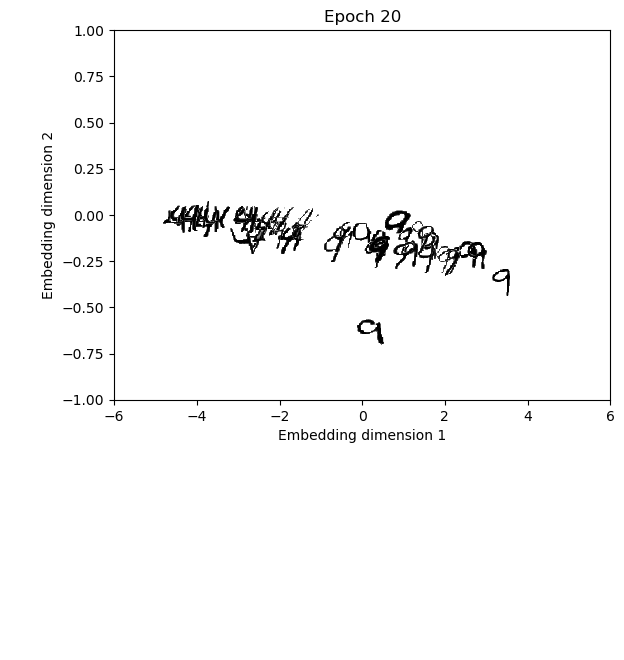

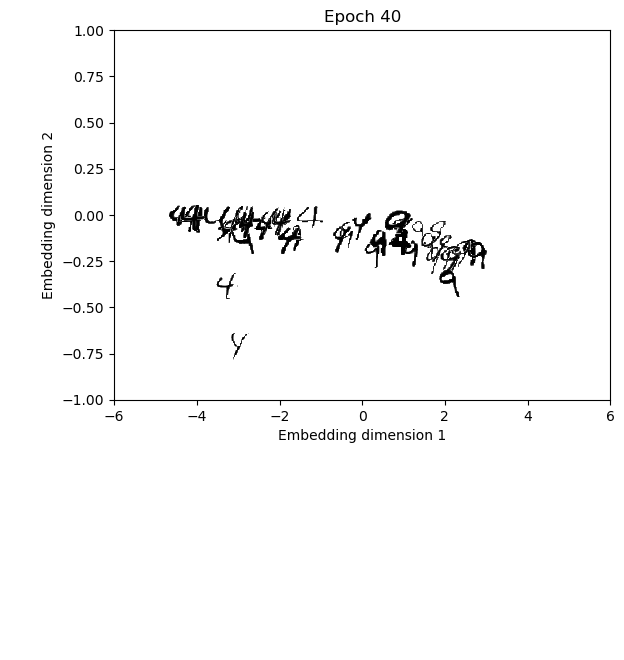

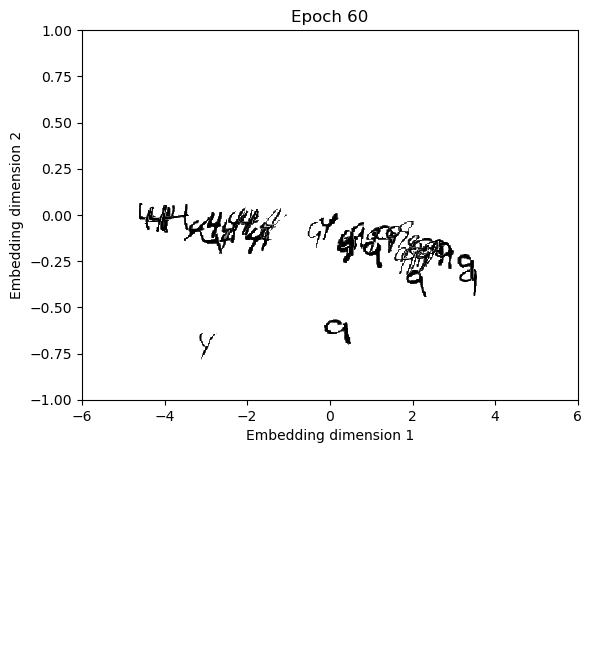

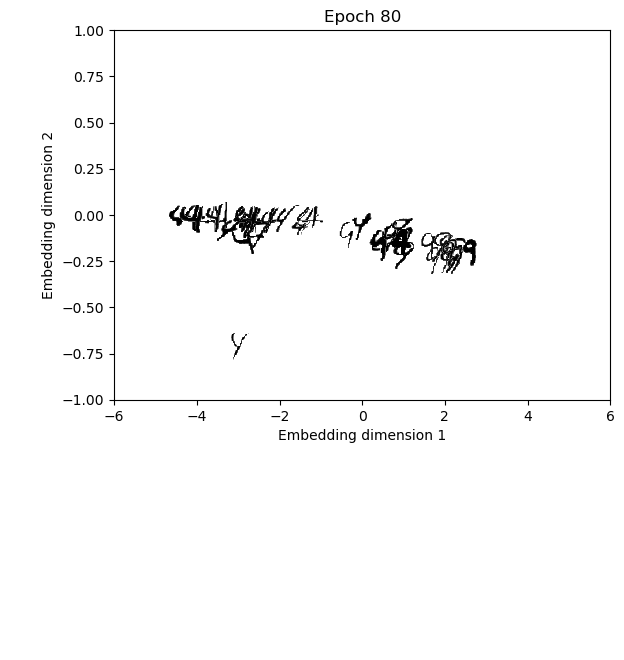

In [20]:
for i in range(0, 100, 20):
    no_prune_linear_full_result.set_trained_model(99)
    fig, ax = no_prune_linear_full_result.plot_image_embeddings(test_pair_dataloader, num_pairs_per_batch=2)
    plt.ylim(-1, 1)
    plt.title(f"Epoch {i}")
    plt.show()

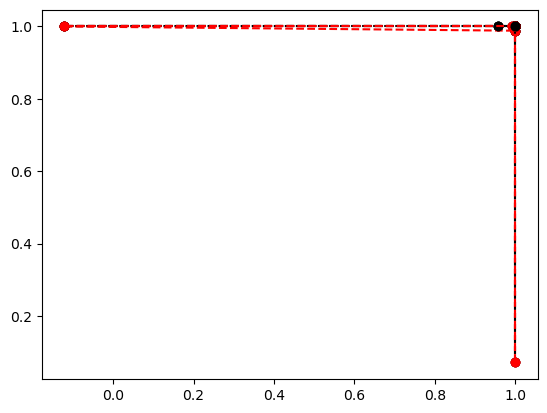

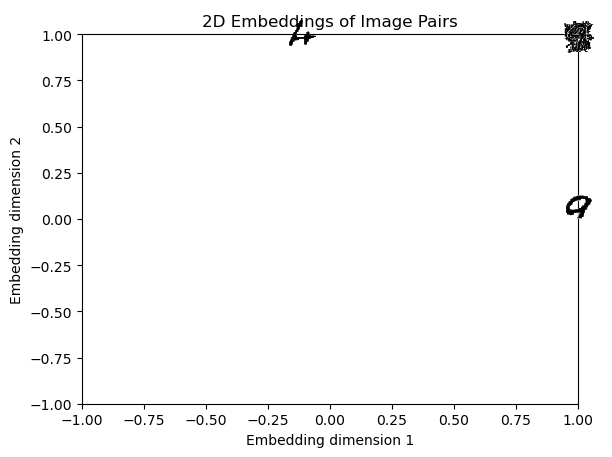

In [21]:
no_prune_tanh_full_result.set_trained_model(99)
no_prune_tanh_full_result.plot_pairs(test_pair_dataloader)
plt.show()
fig, ax = no_prune_tanh_full_result.plot_image_embeddings(test_pair_dataloader)
plt.ylim(-1, 1)
plt.xlim(-1, 1)
plt.show()

# With pruning

## Quick test

```
> sbatch sbatch_scripts/10_prune_linear_fast.sh
Submitted batch job 56409113

> sbatch sbatch_scripts/10_prune_tanh_fast.sh 
Submitted batch job 56409255
```

In [4]:
prune_linear_fast_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/prune_linear_fast/sbatch-56409113_bs-32_sf-0.05_sl-49_vr-6_id-0.5_nti-100_lmd-2_pat-linear_m-5.0_ugpp-True_lr-0.001_s-4")
prune_tanh_fast_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/prune_tanh_fast/sbatch-56409255_bs-32_sf-0.05_sl-49_vr-6_id-0.5_nti-100_lmd-2_pat-Tanh_m-0.2_ugpp-True_lr-0.001_s-4")

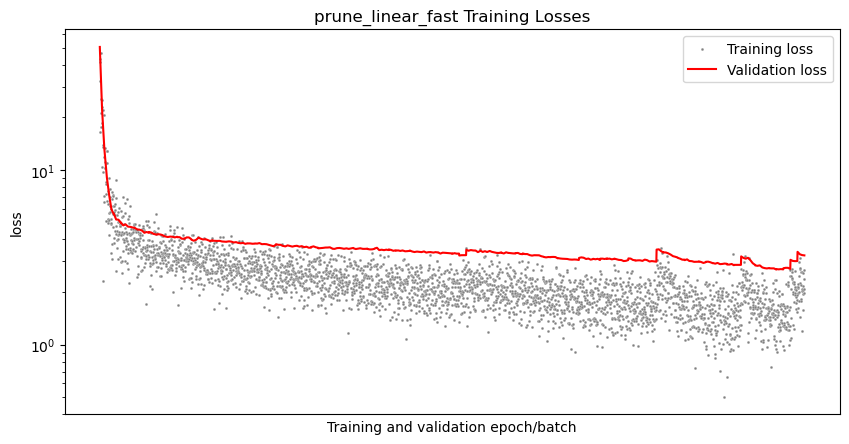

In [5]:
prune_linear_fast_result.plot_training_losses()
plt.show()

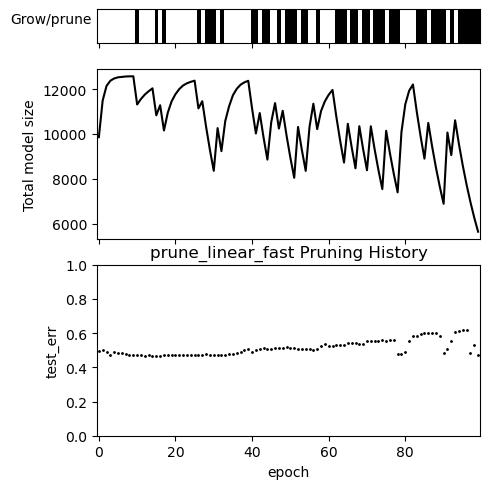

In [7]:
prune_linear_fast_result.plot_pruning()
plt.show()

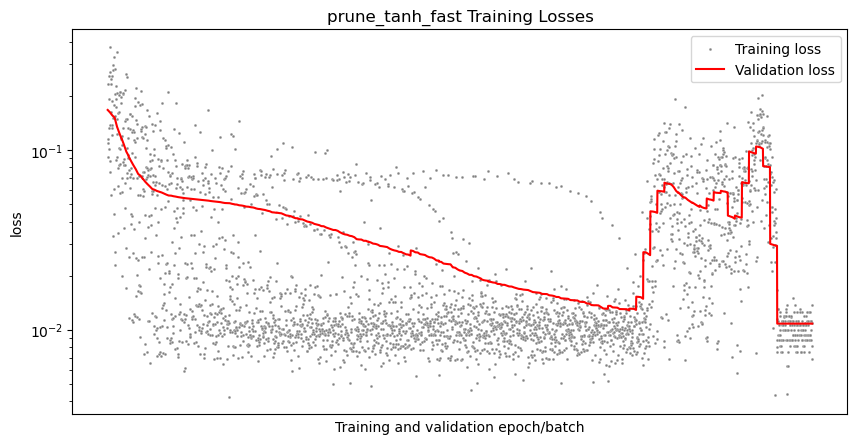

In [6]:
prune_tanh_fast_result.plot_training_losses()
plt.show()

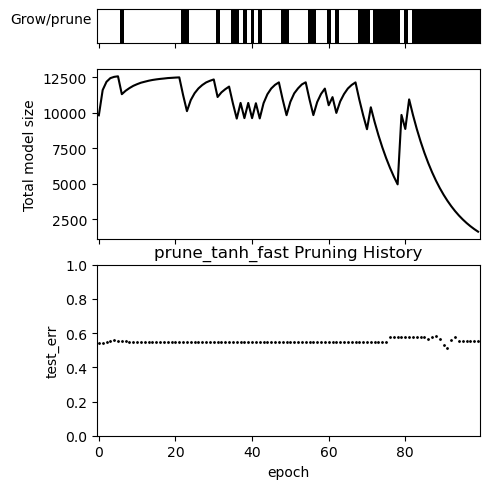

In [8]:
prune_tanh_fast_result.plot_pruning()
plt.show()

## Full jobs

500 epochs, 10% of MNIST

```
> sbatch sbatch_scripts/10_prune_linear_full.sh 
Submitted batch job 56410030
> sbatch sbatch_scripts/10_prune_tanh_full.sh 
Submitted batch job 56410213

```

In [9]:
prune_linear_full_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/prune_linear_full/sbatch-56410030_bs-32_sf-0.1_sl-49_vr-6_id-0.5_nti-500_lmd-2_pat-linear_m-5.0_ugpp-True_lr-0.001_s-4")
prune_tanh_full_result = MLPUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/10/prune_tanh_full/sbatch-56410213_bs-32_sf-0.1_sl-49_vr-6_id-0.5_nti-500_lmd-2_pat-Tanh_m-0.2_ugpp-True_lr-0.001_s-4")

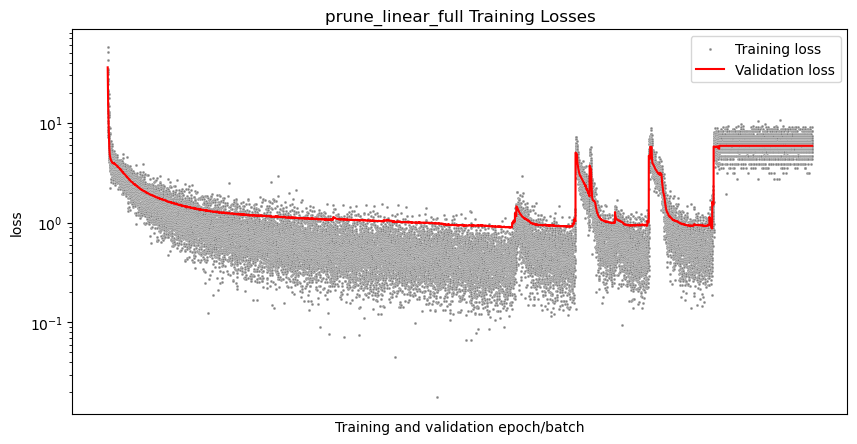

In [10]:
prune_linear_full_result.plot_training_losses()
plt.show()

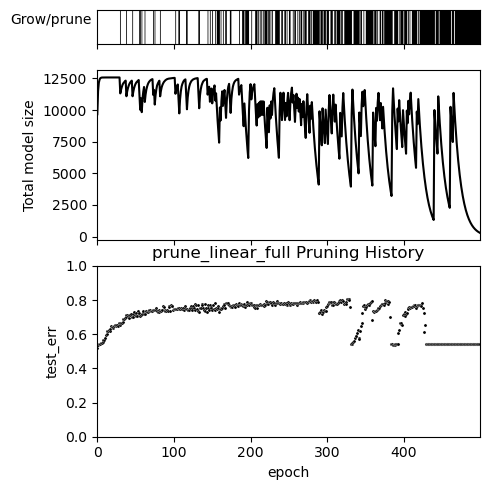

In [11]:
prune_linear_full_result.plot_pruning()
plt.show()

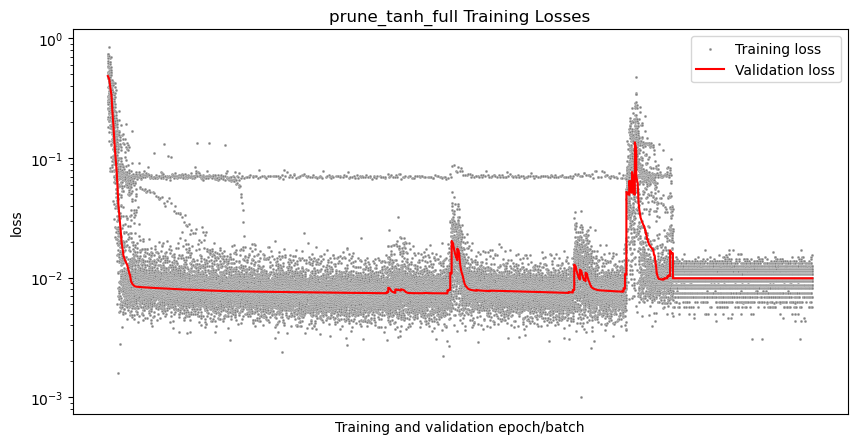

In [12]:
prune_tanh_full_result.plot_training_losses()
plt.show()

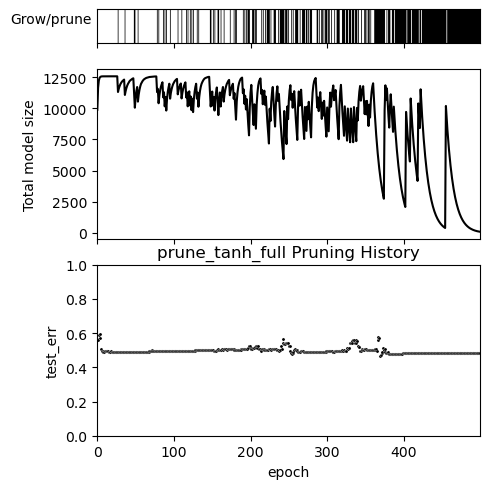

In [13]:
prune_tanh_full_result.plot_pruning()
plt.show()